# Employee Exit Surveys: Cleaning and analysis

This project showcases my experience working with and cleaning data from datasets that are similar in scope to those found in many businesses. 

Within this project, we'll be using data sourced from exit surveys at the Department of Education, Training and Employment (DETE) and the Technical and Further Training Education (TAFE) wing of the Queensland government in Australia. 

Survey data for each organization can be found here:
<ul>
    <li> <a href="https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey">DETE survey </a>
        </li>
    <li><a href="https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey"> TAFE survey</a></li>
    </ul>        
Suppose we work for an HR company and our stakeholders want to know the following:

<ul> 
    <li>Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?</li>
<li>Are younger employees resigning due to some kind of dissatisfaction? What about older employees?</li>
    </ul>
    
Stakeholders want us to combine the results for both surveys to answer their questions. We've learned that although both government organizations used the same survey template, one of them customized some of the repsonses to answers.
We weren't provided a specific data dictionary for this dataset, so we'll take a brief look at the columns and use our general knowledge to define them.

In practice we'd make sure to meet with executives to confirm the definitions of the data.
Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:
* `ID`: An id used to identify the participant of the survey
* `SeparationType`: The reason why the person's employment ended
* `Cease Date`: The year or month the person's employment ended
* `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:

* `Record ID`: An id used to identify the participant of the survey
* `Reason for ceasing employment`: The reason why the person's employment ended
* `LengthofServiceOverall`: Overall Length of Service at Institute (in years): The length of the person's employment (in years)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# reading in the datasets
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

## Exploring Dete Survey Data
To start off our project, we'll first explore the dete dataset. 

Any columns or rows that catch our eye will be further explored.

In [3]:
# exploring the dete dataset and its columns
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
# checking for null values
dete_survey.isnull().sum().sort_values(ascending = False)

Torres Strait                          819
South Sea                              815
Aboriginal                             806
Disability                             799
NESB                                   790
Business Unit                          696
Classification                         367
Opportunities for promotion             87
Career Aspirations                      76
Wellness programs                       56
Coach                                   55
Further PD                              54
Workplace issue                         34
Feedback                                30
Health & Safety                         29
Gender                                  24
Professional Development                14
Stress and pressure support             12
Skills                                  11
Age                                     11
Peer support                            10
My say                                  10
Performance of supervisor                9
Initiative 

In [5]:
# further exploration of column 'Role Start Date'
dete_survey['Role Start Date'].value_counts()

Not Stated    98
2012          65
2011          57
2010          46
2008          45
2007          41
2013          41
2009          38
2006          25
2004          22
2000          20
2005          20
2003          20
1996          19
1999          19
1989          18
1992          17
2002          16
2001          15
1998          15
1988          14
1997          13
1995          13
1975          12
1990          12
1986          11
1993           9
1976           9
1978           9
1991           8
1979           7
1994           7
1985           6
1987           5
1983           5
1981           5
1982           4
1984           4
1980           3
1977           2
1970           2
1974           1
1973           1
200            1
1972           1
1971           1
Name: Role Start Date, dtype: int64

### Brief Overview of Dete Survey Data
Here are some early observations made on our analysis of the dete survey data:
<ul>
    <li>This is a large dataset with over 822 rows and 56 different columns.</li>
    <li>Most columns are classified as boolean types and the rest are object(strings), with the `ID` column being the primary key.</li>
    <li>There are a lot of missing values and a number of columns that seem redundant to our analysis.</li>
    <li>For some columns, 'Not Stated' is a value and is  most likely the organizations take on a null value.</li>
    </ul>

## Exploring Tafe Survey Data
Let's move onto our next dataset the tafe survey data.

We'll use the same exploration techniques that were used to explore the dete dataset.

In [6]:
# tafe survey exploration
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [7]:
# checking for null values
tafe_survey.isnull().sum().sort_values(ascending=False)

Main Factor. Which of these was the main factor for leaving?     589
InductionInfo. Topic:Did you undertake a Corporate Induction?    270
Contributing Factors. Ill Health                                 265
Contributing Factors. Maternity/Family                           265
Contributing Factors. Career Move - Public Sector                265
                                                                ... 
CESSATION YEAR                                                     7
Reason for ceasing employment                                      1
WorkArea                                                           0
Institute                                                          0
Record ID                                                          0
Length: 72, dtype: int64

In [8]:
tafe_survey['Main Factor. Which of these was the main factor for leaving?'].head(10)

0                             NaN
1                             NaN
2                             NaN
3                             NaN
4                             NaN
5                             NaN
6    Career Move - Private Sector
7                             NaN
8                             NaN
9     Career Move - Public Sector
Name: Main Factor. Which of these was the main factor for leaving?, dtype: object

In [9]:
tafe_survey['Main Factor. Which of these was the main factor for leaving?'].value_counts(dropna=False)

NaN                                         589
Dissatisfaction with %[Institute]Q25LBL%     23
Job Dissatisfaction                          22
Other                                        18
Career Move - Private Sector                 16
Interpersonal Conflict                        9
Career Move - Public Sector                   8
Maternity/Family                              6
Career Move - Self-employment                 4
Ill Health                                    3
Study                                         2
Travel                                        2
Name: Main Factor. Which of these was the main factor for leaving?, dtype: int64

In [10]:
# summary of entire dataset
pd.set_option('display.max_columns', 72)
tafe_survey.describe(include='all')

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

### Brief Overview of Tafe Survey Data
Here is a summary of some early observations made based on our work above:

* This is a fairly large data set with 702 rows and 72 columns.
* Many of the columns used here are similar to those in the dete data set.
* Most columns, excpet `ID` and `CESSATION YEAR` are of object(string) type.
* There are numerous columns with ugly naming conventions names and too much detail.
* `Main factor` a column of significance has many missing values. 
* 'Not Stated' is not treated as NaN, we'll have to convert these values. 

# 2. Identify Missing Values and Drop Unnecessary Columns
From our earlier exploration we noticed that there were many values listed as 'Not Stated' which are essenitally NaN values. <b>We'll clean this up by re-reading the data in and using the 'na_values' paramter of pd.read_csv</b>. 

Then we'll drop columns that are irrelevant in helping us answer the stakeholders questions. 

In [11]:
# converting 'Not Stated' values to NaN values.
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

In [12]:
# checking values for conversion
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


By comparing our new dataset versus our old we can see that all 'Not Stated' values have been converted to 'NaN'. 

Next we'll drop several columns that provide less insight into answering our original questions. Several of these columns are object type, meaning that answers may be spread out and difficult to assess an analysis on. We will keep columns that are straightforward.

* In the dete survey dataset, we'll drop columns starting from 28 `Professional development` to 48 `Health & Safety`. 
* In the tafe survey dataset, we'll drop columns from 17 - 66 since most contributing factors lie in columns 1 - 16.

In [13]:
# dropping columns within dete and tafe datasets
dete_survey_new = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_new = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [14]:
# checking column length and names
print(dete_survey_new.columns)
print('\n')
print(tafe_survey_new.columns)
print('\n')
print('shape of dete dataset', dete_survey_new.shape)
print('shape of tafe dataset', tafe_survey_new.shape)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fa

# 3. Cleaning Column Names
Becuase we'll eventually want to merge these datasets, it's a great time to now rename the columns for each dataset. 

In [15]:
dete_survey_new.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [16]:
# removing white space, adding underscores, and making all columns lower case
dete_survey_new.columns = dete_survey_new.columns.str.replace(' ', '_').str.strip().str.lower()

In [17]:
dete_survey_new.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [18]:
tafe_survey_new.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [19]:
tafe_mapper = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype', 
       'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

In [20]:
tafe_survey_new = tafe_survey_new.rename(tafe_mapper, axis = 1)

In [21]:
dete_survey_new.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [22]:
tafe_survey_new.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## 4. Filtering Data
Our end goal is to answer three questions, two of them being:
* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

Since we are interested in analyzing data related to employees resigning, we'll only be looking at employees who resigned. Before filtering out our data for those that have resigned, let's take a quick look at the reasons why people resigned. 

In [23]:
# reasons why employees left from dete survey
dete_survey_new['separationtype'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [24]:
# reasons why employees left from tafe survey
tafe_survey_new['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [25]:
# isolating all tafe resignation rows
tafe_resignations = tafe_survey_new[tafe_survey_new['separationtype'] == 'Resignation'].copy()
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

Within the tafe survey data, we can see that there is a row with NaN. Since we're only working with data related to resignation, dropping this row wouldnt make much of a difference at this point.  

In [26]:
# isolating all data related to resigning
dete_resignations = dete_survey_new[(dete_survey_new['separationtype'] == 'Resignation-Other reasons') | 
                (dete_survey_new['separationtype'] == 'Resignation-Other employer') |                     
                (dete_survey_new['separationtype'] == 'Resignation-Move overseas/interstate')].copy()
dete_resignations['separationtype'].value_counts()


Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [27]:
# combining all the resignation data under one category
dete_resignations['separationtype'] = dete_resignations['separationtype'].str.split('-').str[0]
print(dete_resignations['separationtype'].value_counts())

Resignation    311
Name: separationtype, dtype: int64


## 5. Verifying the Data
In this step we'll be focusing on checking whether the isolated data is good to work with and free of any corruption or errors. 

For `dete_survey` we'll check the following:
* Make sure that the dates in `cease_date` are later than those in `defe_start_date`.
* Check for dates before 1940 in `cease_date` as this branch has many people born after that date, there may be some erroneous data.

In [28]:
# viewing unique values in tafe cease_date column
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [29]:
# checking dtype of the column
print(tafe_resignations['cease_date'].dtype)

float64


The values in `tafe_survey` data indicate that they are all of int type which makes it easy to work with, they are also using floating point values when we checked the type.

In [30]:
# viewing unique values in cease_date column
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
2010         1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

In [31]:
dete_resignations['cease_date'].dtype

dtype('O')

The values in `dete_survey` data are object type, strings. We're gonna be combining these data sets together so we need to convert them to float.

We'll split the values up within the cell and only keep the year. <b>To easily split up the string, we'll index from the position [-1] and eliminate values before the `/` character.</b>

In [32]:
# splitting date values and converting to float.
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

In [33]:
# checking dtype of dete_resignations column
dete_resignations['cease_date'].dtype

dtype('float64')

In [34]:
dete_resignations['dete_start_date'].value_counts(ascending=True)

1963.0     1
1977.0     1
1973.0     1
1975.0     1
1987.0     1
1982.0     1
1984.0     1
1972.0     1
1971.0     1
1974.0     2
1976.0     2
1983.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1990.0     5
1993.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2006.0    13
2009.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [35]:
dete_resignations['cease_date'].value_counts(ascending=True)

2006.0      1
2010.0      2
2014.0     22
2012.0    129
2013.0    146
Name: cease_date, dtype: int64

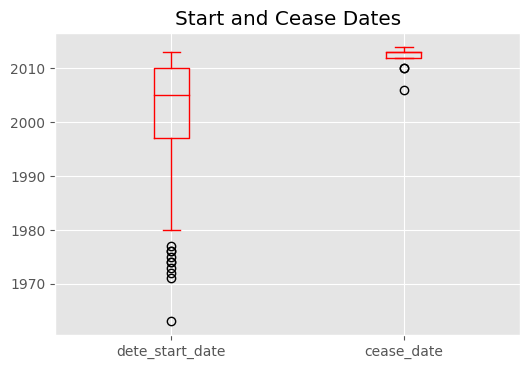

In [36]:
dete_resignations[['dete_start_date','cease_date']].plot(
    kind='box', title='Start and Cease Dates', color='red')
plt.show()

#### Overview of dete starting and resigning years
Looking at the boxplot above, there are really no outliers that stand out except the 1963 date, but this seems normal enough as it may be a very senior employee. It seems as if most people in the organization started working in late 90's and mid 2000's. People seemed to have left from 2009 onward.

In [37]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

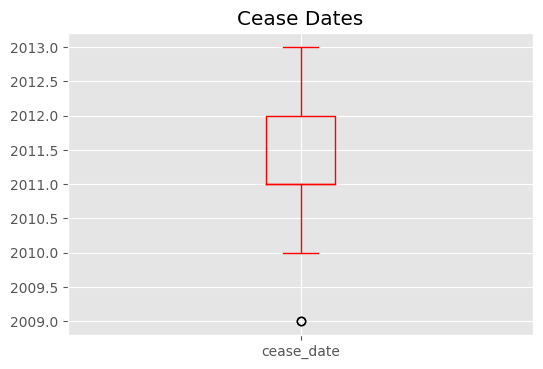

In [38]:
tafe_resignations[['cease_date']].plot(
    kind='box', title='Cease Dates', color='red')
plt.show()

#### Overview of tafe cease date
From the boxplot above, there are no outliers except for one it seems, in which the date of resignation was 2009. Most people in the tafe branch seemed to have resigned in the years 2011 - 2012. There are some years that don't completely align from the dete data. However because this data may still be of significance, we'll keep these rows. 

## 6. Creating a New Column
So now we've verified the data in our `dete_resignation` and `tafe_resignation` data frames. With another glance at the columns involved in both surveys, there is one column that caught my eye: `institute_service`. This column signifies the length of time an employee was with the company. 

In order to combine and analyze both datasets, we'll have to create this same column in the `dete_resignation` dataset.

In [39]:
tafe_resignations

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,21 25,Temporary Full-time,Operational (OO),5-6,5-6
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2


As stated in our section introduction, we need to add another column to dete_resignation
in order to work with both data sets. We can easily get the length of an employees service by 
subtracting the `dete_start_date` and `cease_date` columns from each other.

In [40]:
# creating new column
dete_resignations['institute_service'] = (dete_resignations['cease_date'] - 
                                          dete_resignations['dete_start_date'])

dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


# 7. Finding Dissatisfied Employees
Now we can analyze all employees from both branches by their length of service thanks to the `institute_service` column.

Having this new column will also help us spot insights based on an employees length of employment. 

Now, we need to decide how to categorize employees that are dissatisfied from each survey. We'll select some columns that are the best indicators of an employees decision to resign.

For `tafe_survey` data, we'll use:
* `Contributing_Factors. Dissatisfaction`
* `Contributing_Factors. Job Dissatisfaction`
There doesn't seem to be any other relevant columns to select, the ones we would like to work with are all filled with numerous reasons and could take much more work with little insights to be gained. Therefore we'll stick with the columns above.

For `dete_survey` data we'll use these columns:
* `job_dissatisfaction`
* `dissatisfaction_with_the_department`
* `physical_work_environment`
* `lack_of_recognition`
* `lack_of_job_security`
* `work_location`
* `employment_conditions`
* `work_life_balance`
* `workload`

We chose these columns because they are easy to work with and have True/False values and nothing else.

<b> If the employee indicated that any of the above reasons made them resign, we'll then list that former employee as dissatisfied in a new column. 

In [41]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [42]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

We must change the value of `-` within the Dissatisfaction columns in order for our classification method to work.

In [43]:
# creating function to update the values.
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
    
# updating tafe values
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Job Dissatisfaction', 
                  'Contributing Factors. Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)

In [44]:
tafe_resignations_up = tafe_resignations.copy()

In [45]:
tafe_resignations_up['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

#### Applying categorization to dete data
Because the values in `dete_resignations` are already booleans, we can use the `any` method from pandas. 

In [46]:
# using any function to apply logic across columns
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)

In [47]:
# creating new df for dete
dete_resignations_up = dete_resignations.copy()

In [48]:
dete_resignations_up['dissatisfied'].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combining the Data
We're now ready to combine our datasets! Ideally we want to aggregate our data based on our new column `institute_service`. We'll add a column for each dataset, that allows us to distinguish between the two datasets.

In [49]:
# adding identifying column for dete_survey data
dete_resignations_up['institute'] = 'DETE'

In [50]:
# adding identifying column for tafe_survey data
tafe_resignations_up['institute'] = 'TAFE'

In [51]:
# combining the data frames
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)
combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute,Institute,WorkArea,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18,True,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15,True,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
combined.shape

(651, 53)

There are still several columns within our combined dataframe that are irrelevant in helping us answer the stakeholders questions, so lets drop them. Several columns have data that would be irrelevant in helping us as it would only relate to its specific survey. For the purposes of our analysis, we'll be dropping any columns with less than 500 non-null values.

In [53]:
# checking which columns to drop
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

In [54]:
combined_updated = combined.dropna(thresh = 500, axis =1).copy()
combined_updated.head(10)

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.0,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,10.0,Resignation,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,12.0,Resignation,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE
5,13.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,14,False,DETE
6,15.0,Resignation,2012.0,Teacher,Permanent Full-time,Male,31-35,5,True,DETE
7,17.0,Resignation,2012.0,Teacher Aide,Permanent Part-time,Male,61 or older,NaN,True,DETE
8,21.0,Resignation,2012.0,Teacher,Permanent Full-time,Male,56-60,30,False,DETE
9,22.0,Resignation,2012.0,Cleaner,Permanent Part-time,Female,51-55,32,False,DETE


In [55]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


We've come across a column with inconsistent values. Within the `institute_service` column, values are not of one type. Let's work on changing this.

## Cleaning the Service Column
In order to clean this column up, we'll use classify values based on the following categorization:
* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

We base our categories using these labels largely due to the analysis and findings in this <a href = "https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage"> article </a>, which states that understanding an employees needs based on their length of time in the company is more important than an employees age.

In [56]:
# extracting the years of service and converting values to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

In [57]:
# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [58]:
# making sure we extracted each year for each row
combined_updated['institute_service_up'].shape == combined_updated['institute_service'].shape

True

In [59]:
# creating function to map years to category
def rank(val):
    if pd.isnull(val):
        return np.nan
    elif val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    else:
        return "New"
    
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(rank)

In [60]:
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

Having extracted each year from the `institute_service` column, we then converted the column to a float type. From there we categorized each value based on our above categorization method. We then pushed these categories into a new column `service_cat`. 

We can now start our initial analysis on this cleaned and transformed dataset!

## First Initial Analysis
Within this section, we'll replace the missing values in the dissatisfied column with the most frequent value, False. 

Next, we'll calculate the percentage of employees who resigned due to dissatisfaction in each service_cat group and plot our findings.

In [61]:
# verifying unique values in dissatisfied column
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [62]:
# replacing missing values with most frequent value
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

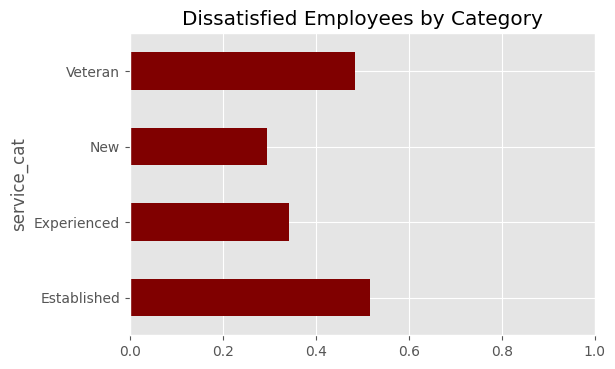

In [63]:
dis_emp = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
dis_emp.plot(kind='barh', color = 'maroon', xlim = (0,1), 
             title='Dissatisfied Employees by Category', legend=None)

We were able to gather some insight from this chart, we can conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction.

Employees with less than 7 years of service seme to resign at a lower rate.

## Analyzing Dissatisfaction by Age
Within this section, we'll take a look at an employees level of dissatisfaction based on their age.

In [64]:
# checking values of age column
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
36  40           32
31  35           32
31-35            29
56 or older      29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [65]:
# extract each age and replace into new column
combined_updated['age'] = combined_updated['age'].astype(str).str.extract(r'(\d+)')
combined_updated['age'] = combined_updated['age'].astype(float)

In [66]:
combined_updated['age'].value_counts(dropna=False)

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
NaN     55
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

In [67]:
combined_updated['age'].mean()

39.27181208053691

Theres a significant amount of missing values for the age column. We wouldn't want to use the most frequent value as this would not skew results. What we'll instead do is take the median value which is also close to the mean. Since the mean is at 39 and the median is at 41, we'll pick 40 as our value to fill missing values.

In [68]:
combined_updated['age'].fillna(40, inplace=True)

Now we need to categorize ages to make visualizing more bearable.

In [69]:
def age_group(val):
    '''Classify age into 4 groups'''
    if val <= 22:
        return 'Gen-Z'
    elif val >22 and val <= 38:
        return 'Millenial'
    elif val > 38 and val <= 54:
        return 'Gen-X'
    elif val >=55:
        return 'Boomer'
    
combined_updated['age_cat'] = combined_updated['age'].apply(age_group)
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,institute_service_up,service_cat,age_cat
0,4.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,36.0,7,False,DETE,7.0,Established,Millenial
1,6.0,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41.0,18,True,DETE,18.0,Veteran,Gen-X
2,9.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,31.0,3,False,DETE,3.0,Experienced,Millenial
3,10.0,Resignation,2012.0,Teacher Aide,Permanent Part-time,Female,46.0,15,True,DETE,15.0,Veteran,Gen-X
4,12.0,Resignation,2012.0,Teacher,Permanent Full-time,Male,31.0,3,False,DETE,3.0,Experienced,Millenial


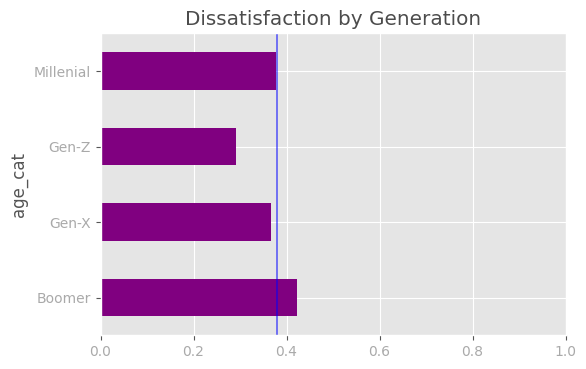

In [70]:
# visualizing our results based on age
diss_age = combined_updated.pivot_table(values='dissatisfied',index='age_cat')
                                              
# plotting the pivot table
diss_age.plot(kind='barh',legend=None, xlim=(0,1), color = 'purple')
plt.xticks(alpha=0.5)
plt.yticks(alpha=0.5)
plt.axvline(x=0.38, color='blue', alpha =0.6, lw=1.2)
plt.title('Dissatisfaction by Generation',alpha=0.7)
plt.show()

This graph gives us much better insight into what age groups of employees are the most dissatisfied. From the chart above, Boomers, followed by millenials seem to be the most dissatisfied.

One more column that may bring us great insight is looking into each organization and comparing dissatisfied employees from each.

Text(0.5, 1.0, 'Dissatisfaction by Institute')

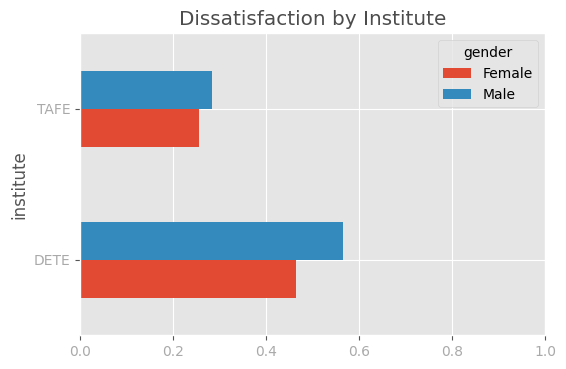

In [84]:
# creating pivot table for both branches
diss_org = combined_updated.pivot_table(values='dissatisfied',index='institute', columns='gender')

## plotting the results

diss_org.plot(kind='barh', xlim=(0,1))
plt.xticks(alpha=0.5)
plt.yticks(alpha=0.5)
plt.title('Dissatisfaction by Institute',alpha=0.7)

We can easily see that DETE seems to have more employees who are dissatisfied as compared to TAFE. It also seems that regardless of the organization, that males are dissatisfied more often than females at both branches. 

# Conclusions
We explored the datasets of Department of Education, Training and Employment (DETE) and  Technical and Further Education (TAFE) institute in Queensland, Australia. 

In regards to answering the stakeholders questions, the following conclusions have been found:

* Employees that spent 7 and more years in the company have the highest rate of dissatisfaction as the main reason for resignation.
* Men are more likely to resign due to dissatisfaction compared to women.
* DETE produces much more resignations due to employee dissatisfaction.
* In terms of dissatisfaction by generation, Gen Z has the lowest rates, with Boomers and millenials having the highest.
